In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import seaborn as sn
%matplotlib inline

Importing Data

In [2]:
df = pd.read_csv('Churn_Modelling.csv', index_col= 0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis + Feature engineering(scaling + encoding)

In [3]:
df.drop(['CustomerId', 'Surname'], axis='columns', inplace=True)

In [4]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 11)

In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [8]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [9]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [10]:
df.Gender.replace({'Female': 1, 'Male': 0}, inplace=True)

In [11]:
df2 = pd.get_dummies(df, drop_first= True)

In [12]:
df2.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,1,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,0,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,True


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int64  
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 878.9 KB


In [15]:
x = df2.drop('Exited', axis='columns')
y = df2.Exited

In [16]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(x,y,test_size=0.2)

In [17]:
scaler = MinMaxScaler()
x_tr = scaler.fit_transform(x_tr)
x_te = scaler.transform(x_te)

In [18]:
x_tr.shape, y_tr.shape,x_te.shape, y_te.shape

((8000, 11), (8000,), (2000, 11), (2000,))

In [19]:
x_tr

array([[0.774     , 1.        , 0.05405405, ..., 0.53180048, 1.        ,
        0.        ],
       [0.248     , 1.        , 0.16216216, ..., 0.31586335, 0.        ,
        0.        ],
       [0.734     , 0.        , 0.40540541, ..., 0.85005647, 0.        ,
        0.        ],
       ...,
       [0.668     , 0.        , 0.32432432, ..., 0.11566801, 1.        ,
        0.        ],
       [0.396     , 0.        , 0.28378378, ..., 0.82516121, 0.        ,
        1.        ],
       [0.744     , 1.        , 0.18918919, ..., 0.56850875, 0.        ,
        1.        ]])

In [20]:
model = keras.Sequential([
    keras.layers.Dense(11, input_shape=(11,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)

model.fit(x_tr, y_tr, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5933 - accuracy: 0.6995
Epoch 2/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4907 - accuracy: 0.7935
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4731 - accuracy: 0.7936
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4603 - accuracy: 0.7954
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4513 - accuracy: 0.8002
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4441 - accuracy: 0.8090
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4372 - accuracy: 0.8125
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4311 - accuracy: 0.8140
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4255 - accuracy: 0.8180
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4188 - accura

250/250 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8639
Epoch 82/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8630
Epoch 83/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8654
Epoch 84/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8622
Epoch 85/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8636
Epoch 86/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8643
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3351 - accuracy: 0.8631
Epoch 88/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3342 - accuracy: 0.8633
Epoch 89/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8645
Epoch 90/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3338 - accuracy: 

In [21]:
model.evaluate(x_te,y_te)

63/63 [==============================] - 0s 2ms/step - loss: 0.3589 - accuracy: 0.8560


[0.35893920063972473, 0.8560000061988831]

In [22]:
yp = model.predict(x_te)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.4284454 ],
       [0.48121902],
       [0.390441  ],
       ...,
       [0.15464772],
       [0.53721774],
       [0.09545728]], dtype=float32)

In [23]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [24]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1615
           1       0.67      0.49      0.57       385

    accuracy                           0.86      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.86      0.85      2000



Text(95.72222222222221, 0.5, 'Truth')

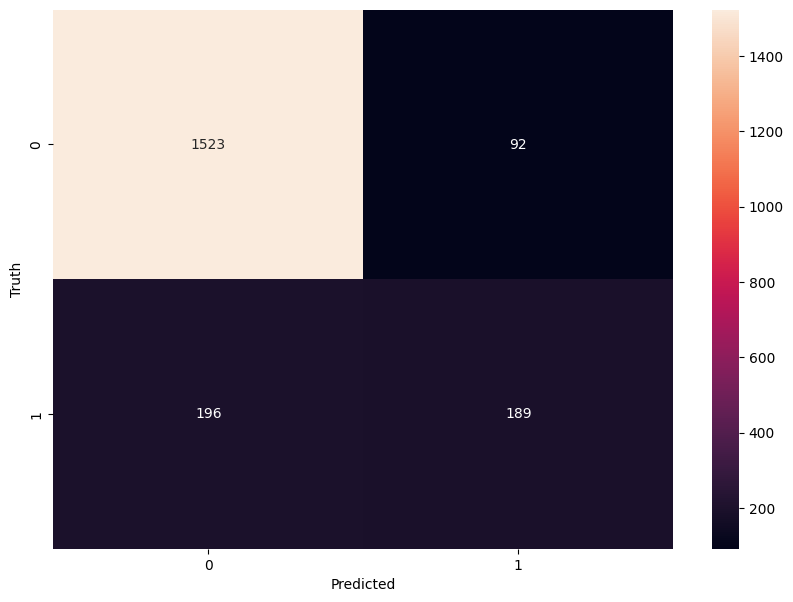

In [25]:
cm = tf.math.confusion_matrix(labels=y_te,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')